# Your Title Here

**Name(s)**: Antony Munkhchuluun

**Website Link**: https://antonybooming.github.io/outage_project/

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # No line wrapping
pd.set_option('display.max_colwidth', None)    # Show full cell contents
# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

# Question: 
What are the characteristics of major power outages with higher severity? 
Variables to consider include location, time, climate, land-use characteristics, 
electricity consumption patterns, economic characteristics, etc. 
What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?

# Significance:
Readers of my website should care about the dataset and my question because it shows energy companies what variables and characteristics
they should look out for when predicting the location and the severity of its next major power outage.

#### DataFrame: 
1535 rows and 56 columns

In [3]:
df = pd.read_csv('outage.csv')
df['CAUSE.CATEGORY'].unique()

array([nan, 'severe weather', 'intentional attack',
       'system operability disruption', 'equipment failure',
       'public appeal', 'fuel supply emergency', 'islanding'],
      dtype=object)

# Columns details:

### GENERAL INFORMATION

Time of the outage event 
- `YEAR`: Indicates the year when the outage event occurred.
- `MONTH`: Indicates the month when the outage event occurred.

Geographic areas	      
- `U.S._STATE`: Represents all the states in the continental U.S.
- `POSTAL.CODE`: Represents the postal code of the U.S. states.
- `NERC.REGION`: The North American Electric Reliability Corporation (NERC) regions involved in the outage event.

### REGIONAL CLIMATE INFORMATION

U.S. Climate regions	
- `CLIMATE.REGION`: U.S. Climate regions as specified by National Centers for Environmental Information (nine climatically consistent regions in continental U.S.A.).

El Niño/La Niña
- `ANOMALY.LEVEL`: This represents the oceanic El Niño/La Niña (ONI) index referring to the cold and warm episodes by season. It is estimated as a 3-month running mean of ERSST.v4 SST anomalies in the Niño 3.4 region (5°N to 5°S, 120–170°W) [6]
- `CLIMATE.CATEGORY`: This represents the climate episodes corresponding to the years. The categories—“Warm”, “Cold” or “Normal” episodes of the climate are based on a threshold of ± 0.5 °C for the Oceanic Niño Index (ONI)

### OUTAGE EVENTS INFORMATION

Event start and end information
- `OUTAGE.START.DATE`: This variable indicates the day of the year when the outage event started (as reported by the corresponding Utility in the region)
- `OUTAGE.START.TIME`: This variable indicates the time of the day when the outage event started (as reported by the corresponding Utility in the region)
- `OUTAGE.RESTORATION.DATE`: This variable indicates the day of the year when power was restored to all the customers (as reported by the corresponding Utility in the region)
- `OUTAGE.RESTORATION.TIME`: This variable indicates the time of the day when power was restored to all the customers (as reported by the corresponding Utility in the region)

Cause of the event	
- `CAUSE.CATEGORY`: Categories of all the events causing the major power outages
- `CAUSE.CATEGORY.DETAIL`: Detailed description of the event categories causing the major power outages
- `HURRICANE.NAMES`: If the outage is due to a hurricane, then the hurricane name is given by this variable

Extent of outages	
- `OUTAGE.DURATION`: Duration of outage events (in minutes)
- `DEMAND.LOSS.MW`: Amount of peak demand lost during an outage event (in Megawatt) [but in many cases, total demand is reported]
- `CUSTOMERS.AFFECTED`: Number of customers affected by the power outage event

### REGIONAL ELECTRICITY CONSUMPTION INFORMATION

Electricity price	
- `RES.PRICE`: Monthly electricity price in the residential sector (cents/kilowatt-hour)
- `COM.PRICE`: Monthly electricity price in the commercial sector (cents/kilowatt-hour)
- `IND.PRICE`: Monthly electricity price in the industrial sector (cents/kilowatt-hour)
- `TOTAL.PRICE`: Average monthly electricity price in the U.S. state (cents/kilowatt-hour)

Electricity consumption	
- `RES.SALES`: Electricity consumption in the residential sector (megawatt-hour)
- `COM.SALES`: Electricity consumption in the commercial sector (megawatt-hour)
- `IND.SALES`: Electricity consumption in the industrial sector (megawatt-hour)
- `TOTAL.SALES`: Total electricity consumption in the U.S. state (megawatt-hour)
- `RES.PERCEN`: Percentage of residential electricity consumption compared to the total electricity consumption in the state (in %)
- `COM.PERCEN`: Percentage of commercial electricity consumption compared to the total electricity consumption in the state (in %)
- `IND.PERCEN`: Percentage of industrial electricity consumption compared to the total electricity consumption in the state (in %)

Customers served	
- `RES.CUSTOMERS`: Annual number of customers served in the residential electricity sector of the U.S. state
- `COM.CUSTOMERS`: Annual number of customers served in the commercial electricity sector of the U.S. state
- `IND.CUSTOMERS`: Annual number of customers served in the industrial electricity sector of the U.S. state
- `TOTAL.CUSTOMERS`: Annual number of total customers served in the U.S. state
- `RES.CUST.PCT`: Percent of residential customers served in the U.S. state (in %)
- `COM.CUST.PCT`: Percent of commercial customers served in the U.S. state (in %)
- `IND.CUST.PCT`:Percent of industrial customers served in the U.S. state (in %)

### REGIONAL ECONOMIC CHARACTERISTICS

Economic outputs	
- `PC.REALGSP.STATE`: Per capita real gross state product (GSP) in the U.S. state (measured in 2009 chained U.S. dollars)
- `PC.REALGSP.USA`: Per capita real GSP in the U.S. (measured in 2009 chained U.S. dollars)
- `PC.REALGSP.REL`: Relative per capita real GSP as compared to the total per capita real GDP of the U.S. (expressed as fraction of per capita State real GDP & per capita US real GDP)
- `PC.REALGSP.CHANGE`: Percentage change of per capita real GSP from the previous year (in %)
- `UTIL.REALGSP`: Real GSP contributed by Utility industry (measured in 2009 chained U.S. dollars)
- `TOTAL.REALGSP`: Real GSP contributed by all industries (total) (measured in 2009 chained U.S. dollars)
- `UTIL.CONTRI`: Utility industry׳s contribution to the total GSP in the State (expressed as percent of the total real GDP that is contributed by the Utility industry) (in %)
- `PI.UTIL.OFUSA`: State utility sector׳s income (earnings) as a percentage of the total earnings of the U.S. utility sector׳s income (in %)

### REGIONAL LAND-USE CHARACTERICS

Population	
- `POPULATION`: Population in the U.S. state in a year
- `POPPCT_URBAN`: Percentage of the total population of the U.S. state represented by the urban population (in %)
- `POPPCT_UC`: Percentage of the total population of the U.S. state represented by the population of the urban clusters (in %)
- `POPDEN_URBAN`: Population density of the urban areas (persons per square mile)
- `POPDEN_UC`: Population density of the urban clusters (persons per square mile)
- `POPDEN_RURAL`: Population density of the rural areas (persons per square mile)

Land area	
- `AREAPCT_URBAN`: Percentage of the land area of the U.S. state represented by the land area of the urban areas (in %)
- `AREAPCT_UC`: Percentage of the land area of the U.S. state represented by the land area of the urban clusters (in %)
- `PCT_LAND`: Percentage of land area in the U.S. state as compared to the overall land area in the continental U.S. (in %)
- `PCT_WATER_TOT`: Percentage of water area in the U.S. state as compared to the overall water area in the continental U.S. (in %)
- `PCT_WATER_INLAND`: Percentage of inland water area in the U.S. state as compared to the overall inland water area in the continental U.S. (in %)

## Step 2: Data Cleaning and Exploratory Data Analysis

- Turned start date and time of outage into one TimeStamp objects
- Turned restoration date and time into one TimeStamp objects

In [19]:
df_cleaned = df.copy()
df_cleaned['OUTAGE.START.DATE.TIME'] = df['OUTAGE.START.DATE'] + ' ' + df['OUTAGE.START.TIME']
df_cleaned['OUTAGE.START.DATE.TIME'] = pd.to_datetime(df_cleaned['OUTAGE.START.DATE.TIME'][1:], format="%A, %B %d, %Y %I:%M:%S %p")
df_cleaned['OUTAGE.RESTORATION.DATE.TIME'] = df['OUTAGE.RESTORATION.DATE'] + ' ' + df['OUTAGE.RESTORATION.TIME']
df_cleaned['OUTAGE.RESTORATION.DATE.TIME'] = pd.to_datetime(df_cleaned['OUTAGE.RESTORATION.DATE.TIME'][1:], format="%A, %B %d, %Y %I:%M:%S %p")
df_cleaned['RES.SALES'] = pd.to_numeric(df["RES.SALES"], errors="coerce")
df_cleaned['RES.CUSTOMERS'] = pd.to_numeric(df["RES.CUSTOMERS"], errors="coerce")
df_cleaned['OUTAGE.DURATION'] = pd.to_numeric(df["OUTAGE.DURATION"], errors="coerce")
df_cleaned['CUSTOMERS.AFFECTED'] = pd.to_numeric(df['CUSTOMERS.AFFECTED'], errors="coerce")
df_cleaned = df_cleaned[['U.S._STATE', 'OUTAGE.START.DATE.TIME', 'OUTAGE.RESTORATION.DATE.TIME',
                        'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE.DURATION', 'CUSTOMERS.AFFECTED', 'RES.SALES',
                        'RES.CUSTOMERS']]
df_cleaned = df_cleaned.iloc[1:]
df_cleaned.head()

,U.S._STATE,OUTAGE.START.DATE.TIME,OUTAGE.RESTORATION.DATE.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,CUSTOMERS.AFFECTED,RES.SALES,RES.CUSTOMERS
1,Minnesota,2011-07-01 17:00:00,2011-07-03 20:00:00,severe weather,NaN,NaN,3060.0,70000.0,2332915.0,2308736.0
2,Minnesota,2014-05-11 18:38:00,2014-05-11 18:39:00,intentional attack,vandalism,NaN,1.0,NaN,1586986.0,2345860.0
3,Minnesota,2010-10-26 20:00:00,2010-10-28 22:00:00,severe weather,heavy wind,NaN,3000.0,70000.0,1467293.0,2300291.0
4,Minnesota,2012-06-19 04:30:00,2012-06-20 23:00:00,severe weather,thunderstorm,NaN,2550.0,68200.0,1851519.0,2317336.0
5,Minnesota,2015-07-18 02:00:00,2015-07-19 07:00:00,severe weather,NaN,NaN,1740.0,250000.0,2028875.0,2374674.0


In [202]:
print(df_cleaned[['U.S._STATE', 'OUTAGE.START.DATE.TIME', 'OUTAGE.RESTORATION.DATE.TIME']].head().to_markdown(index=False))

| U.S._STATE   | OUTAGE.START.DATE.TIME   | OUTAGE.RESTORATION.DATE.TIME   |
|:-------------|:-------------------------|:-------------------------------|
| Minnesota    | 2011-07-01 17:00:00      | 2011-07-03 20:00:00            |
| Minnesota    | 2014-05-11 18:38:00      | 2014-05-11 18:39:00            |
| Minnesota    | 2010-10-26 20:00:00      | 2010-10-28 22:00:00            |
| Minnesota    | 2012-06-19 04:30:00      | 2012-06-20 23:00:00            |
| Minnesota    | 2015-07-18 02:00:00      | 2015-07-19 07:00:00            |


In [203]:
print(df_cleaned[['HURRICANE.NAMES', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL']].head().to_markdown(index=False))

|   HURRICANE.NAMES | CAUSE.CATEGORY     | CAUSE.CATEGORY.DETAIL   |
|------------------:|:-------------------|:------------------------|
|               nan | severe weather     | nan                     |
|               nan | intentional attack | vandalism               |
|               nan | severe weather     | heavy wind              |
|               nan | severe weather     | thunderstorm            |
|               nan | severe weather     | nan                     |


In [204]:
print(df_cleaned[['OUTAGE.DURATION', 'CUSTOMERS.AFFECTED', 'RES.SALES', 'RES.CUSTOMERS']].head().to_markdown(index=False))

|   OUTAGE.DURATION |   CUSTOMERS.AFFECTED |   RES.SALES |   RES.CUSTOMERS |
|------------------:|---------------------:|------------:|----------------:|
|              3060 |                70000 | 2.33292e+06 |     2.30874e+06 |
|                 1 |                  nan | 1.58699e+06 |     2.34586e+06 |
|              3000 |                70000 | 1.46729e+06 |     2.30029e+06 |
|              2550 |                68200 | 1.85152e+06 |     2.31734e+06 |
|              1740 |               250000 | 2.02888e+06 |     2.37467e+06 |


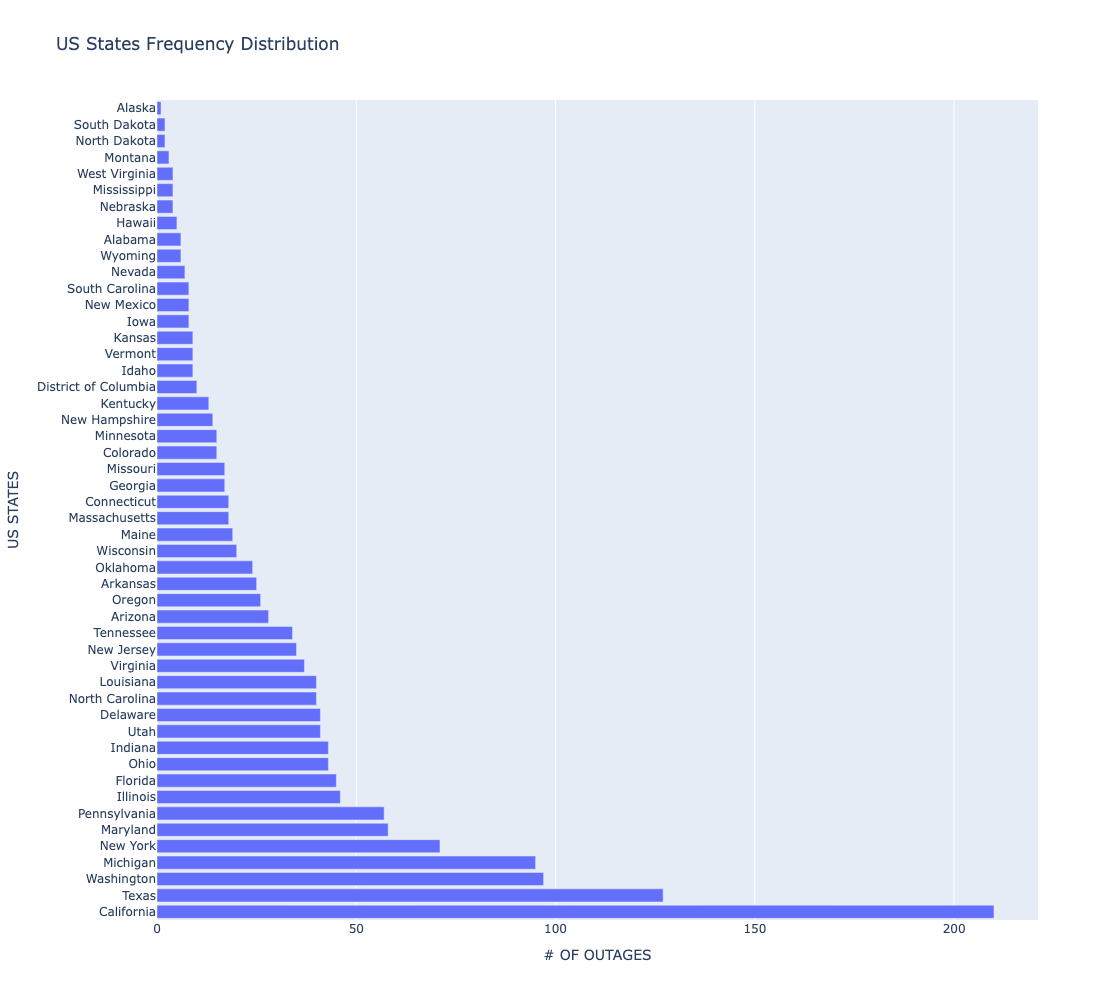

In [13]:
fig = px.bar(df_cleaned["U.S._STATE"].value_counts().reset_index(),
             x="count",
             y="U.S._STATE",
             labels={"count": "# OF OUTAGES", "U.S._STATE": "US STATES"},
             title="US States Frequency Distribution",
            height=800, width=1000)
fig.update_layout(height=1000)
fig.write_html("state-outage-bar.html", include_plotlyjs='cdn')
fig.show()

#### As you may be able to see that California has the highest number of outages in our dataset, whereas Alaska has the least. Hmm, I wonder why?

In [213]:
states_res_sales = df_cleaned.groupby('U.S._STATE')['RES.SALES'].sum().reset_index()
states_res_sales['RES.SALES'] = states_res_sales['RES.SALES'].apply(lambda x: "{:,.0f}".format(x))
states_number_of_outages = df_cleaned["U.S._STATE"].value_counts().reset_index()
merged_df = states_res_sales.merge(states_number_of_outages, on='U.S._STATE', how='left')
merged_df = merged_df.rename(columns={'count': '# of outages'})
print(merged_df.head().to_markdown(index=False))

| U.S._STATE   | RES.SALES     |   # of outages |
|:-------------|:--------------|---------------:|
| Alabama      | 14,412,302    |              6 |
| Alaska       | 0             |              1 |
| Arizona      | 71,963,016    |             28 |
| Arkansas     | 39,514,393    |             25 |
| California   | 1,546,533,874 |            210 |


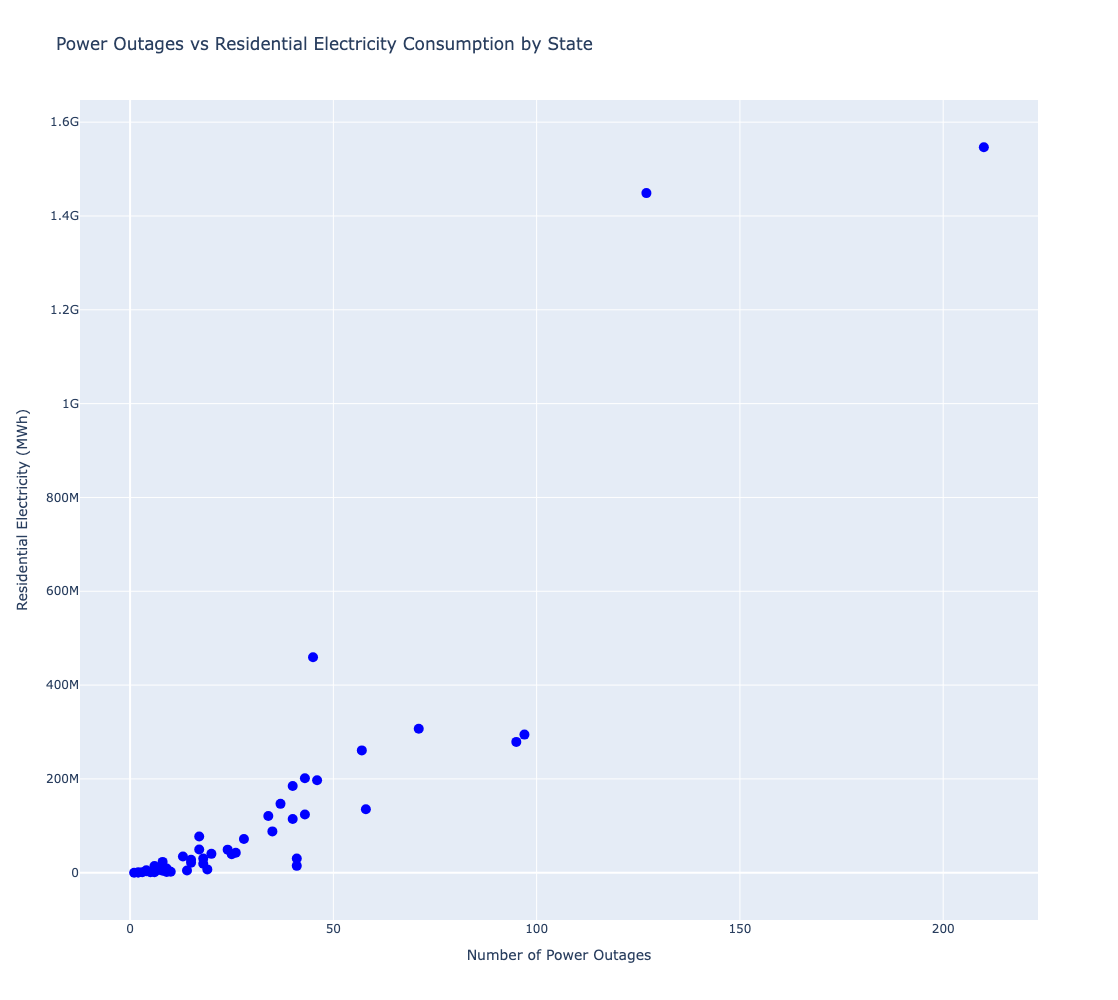

In [23]:
states_res_sales = df_cleaned.groupby('U.S._STATE')['RES.SALES'].sum().reset_index()
# This grouped table shows the total electricity consumption in the residential sector in megawatt-hour within each state.
states_count = df_cleaned['U.S._STATE'].value_counts().reset_index()
merged_df = states_count.merge(states_res_sales, on='U.S._STATE', how='left')

fig = px.scatter(merged_df,
                 x="count",
                 y="RES.SALES",
                 hover_name="U.S._STATE",  # display state names near points
                 title="Power Outages vs Residential Electricity Consumption by State",
                 labels={"count": "Number of Power Outages",
                         "RES.SALES": "Residential Electricity Consumption (MWh)"},
                 height=800, width=1000
                    )

fig.update_traces(marker=dict(size=10, color="blue")
                 )
fig.update_layout(height=1000,
                showlegend=False,
                  yaxis_tickformat="~s",  # 1.5M for 1,500,000
                  yaxis_title="Residential Electricity (MWh)"
                 )
fig.write_html("step2-outage-scatter.html", include_plotlyjs='cdn')
fig.show()

#### From this bivariate visualization, you are able to see that as there's more units of electricity consumption in the residential sector, there's more number of outages. This is visible throughout each state where each states has different numbers of outages.

## Step 3: Assessment of Missingness

In [179]:
df_cleaned[df_cleaned['CAUSE.CATEGORY.DETAIL'] == 'hurricanes']

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START.DATE.TIME,OUTAGE.RESTORATION.DATE.TIME
72,72.0,2012.0,10.0,West Virginia,WV,RFC,Central,0.3,normal,"Monday, October 29, 2012",12:00:00 AM,"Friday, November 09, 2012",11:59:00 PM,severe weather,hurricanes,Sandy,17339.0,NaN,208000.0,10.18,8.7,6.26,8.1,751358.0,661754,1067754,2481277,30.28110122,26.66989619,43.03243854,865673.0,138687.0,12472.0,1016833.0,85.1342,13.6391,1.2266,35479,48156,0.7367513913,-1.6,1968,65859,2.988202068,0.8,1856283.0,48.72,15.52,1409.9,1326.4,40.6,2.66,0.9,99.20759389,0.7924061081,0.7924061081,2012-10-29 00:00:00,2012-11-09 23:59:00
185,185.0,2007.0,9.0,Texas,TX,SPP,South,-0.9,cold,"Thursday, September 13, 2007",4:00:00 AM,"Friday, September 14, 2007",7:00:00 PM,severe weather,hurricanes,Humberto,2340.0,NaN,118000.0,12.44,9.88,7.76,10.3,13316662.0,10376502,9494213,33193019,40.11886355,31.2610974,28.6030415,9166849.0,1413358.0,168586.0,10748834.0,85.2823,13.1489,1.5684,49068,49126,0.9988193625,2.5,27695,1169399,2.36831056,10.9,23831983.0,84.7,9.35,2435.3,1539.9,15.2,3.35,0.58,97.25833594,2.742036367,2.090872537,2007-09-13 04:00:00,2007-09-14 19:00:00
187,187.0,2003.0,7.0,Texas,TX,TRE,South,0.1,normal,"Tuesday, July 15, 2003",8:24:00 AM,"Monday, July 21, 2003",10:30:00 PM,severe weather,hurricanes,Claudette,9486.0,265,108000.0,9.97,8.6,5.73,8.38,13868724.0,9444322,9137832,32458960,42.7269512,29.09619409,28.15195558,8493309.0,1501389.0,119168.0,10114100.0,83.9749,14.8445,1.1782,44959,45858,0.9803960051,-0.9,25528,990481,2.577333639,9.8,22030931.0,84.7,9.35,2435.3,1539.9,15.2,3.35,0.58,97.25833594,2.742036367,2.090872537,2003-07-15 08:24:00,2003-07-21 22:30:00
198,198.0,2005.0,9.0,Texas,TX,TRE,South,0,normal,"Saturday, September 24, 2005",6:00:00 AM,"Sunday, October 02, 2005",5:00:00 PM,severe weather,hurricanes,Rita,12180.0,260,200000.0,11.66,9.52,8.25,10.13,14574387.0,11120667,8278815,33978964,42.89238189,32.72809318,24.36453036,8823252.0,1461530.0,113955.0,10398774.0,84.8490,14.0548,1.0959,46451,48090,0.9659180703,0.1,25391,1058069,2.399748977,9.7,22778123.0,84.7,9.35,2435.3,1539.9,15.2,3.35,0.58,97.25833594,2.742036367,2.090872537,2005-09-24 06:00:00,2005-10-02 17:00:00
203,203.0,2008.0,9.0,Texas,TX,TRE,South,-0.3,normal,"Friday, September 12, 2008",6:21:00 PM,"Wednesday, October 01, 2008",11:59:00 PM,severe weather,hurricanes,Ike,27698.0,8087,2142678.0,13.51,10.78,8.93,11.33,11987612.0,10022219,8564730,30580544,39.20012672,32.77318742,28.00712113,9461508.0,1418297.0,161115.0,11040962.0,85.6946,12.8458,1.4592,48322,48401,0.9983678023,-1.5,27438,1174672,2.335800973,11.8,24309039.0,84.7,9.35,2435.3,1539.9,15.2,3.35,0.58,97.25833594,2.742036367,2.090872537,2008-09-12 18:21:00,2008-10-01 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1389.0,2004.0,9.0,Georgia,GA,SERC,Southeast,0.7,warm,"Monday, September 27, 2004",8:00:00 AM,"Monday, September 27, 2004",2:00:00 PM,severe weather,hurricanes,Jeanne,360.0,854,85455.0,8.4,6.91,4.45,6.83,4345878.0,3655367,3000630,11018150,39.44290103,33.17586891,27.23351924,3751795.0,499964.0,12772.0,4264532.0,87.9767,11.7238,0.299

In [180]:
df_cleaned.isna().sum()

OBS                                1
YEAR                               1
MONTH                             10
U.S._STATE                         1
POSTAL.CODE                        1
NERC.REGION                        1
CLIMATE.REGION                     7
ANOMALY.LEVEL                      9
CLIMATE.CATEGORY                  10
OUTAGE.START.DATE                  9
OUTAGE.START.TIME                  9
OUTAGE.RESTORATION.DATE           58
OUTAGE.RESTORATION.TIME           58
CAUSE.CATEGORY                     1
CAUSE.CATEGORY.DETAIL            472
HURRICANE.NAMES                 1463
OUTAGE.DURATION                   59
DEMAND.LOSS.MW                   705
CUSTOMERS.AFFECTED               444
RES.PRICE                         22
COM.PRICE                         22
IND.PRICE                         22
TOTAL.PRICE                       22
RES.SALES                         23
COM.SALES                         22
IND.SALES                         22
TOTAL.SALES                       22
R

We're treating:
The distribution of power_outage_cause for all rows (i.e., the entire DataFrame)

vs. the distribution of power_outage_cause only for rows where hurricane_name is missing

as two empirical distributions (two "samples").

### So we compute something like TVD between those two distributions to quantify their difference.

In [27]:
df_cleaned['is_missing_name'] = df_cleaned['HURRICANE.NAMES'].isna()
total_dist = df_cleaned['CAUSE.CATEGORY.DETAIL'].value_counts(normalize=True).sort_index()

In [28]:
missing_name_dist = df_cleaned[df_cleaned['is_missing_name']]['CAUSE.CATEGORY.DETAIL'].value_counts(normalize=True).sort_index()

In [29]:
observed_tvd = np.abs(total_dist - missing_name_dist).sum() / 2

In [30]:
simulated_tvds = []
simulated_missing_names_df = df_cleaned.copy()
for _ in np.arange(1000):
    simulated_missing_names_df['is_missing_name'] = np.random.permutation(df_cleaned['is_missing_name'])
    simulated_missing_name_dist = simulated_missing_names_df[simulated_missing_names_df['is_missing_name']]['CAUSE.CATEGORY.DETAIL'].value_counts(normalize=True).sort_index()
    simulated_tvd = np.abs(total_dist - simulated_missing_name_dist).sum() / 2
    simulated_tvds.append(simulated_tvd)

p_value = (simulated_tvds >= observed_tvd).mean()
p_value

np.float64(0.0)

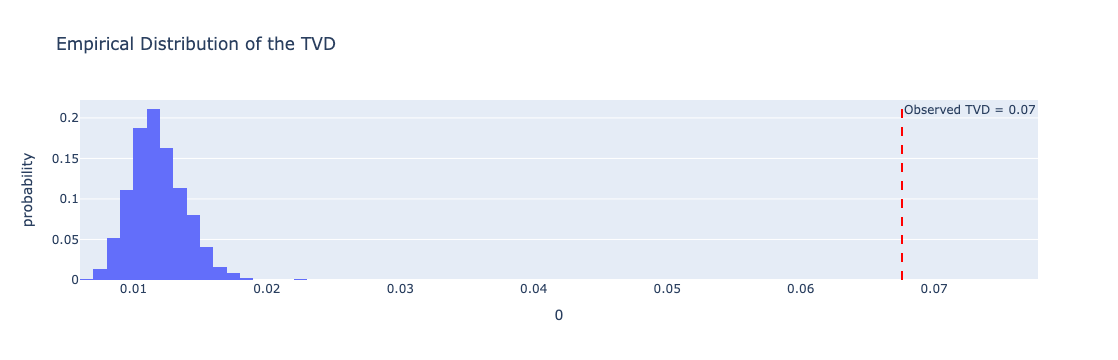

In [36]:
fig = px.histogram(pd.DataFrame(simulated_tvds), x=0, nbins=20, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(
    x=observed_tvd,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Observed TVD = {observed_tvd:.2f}",
    annotation_position="top right"
)
fig.write_html("step3-outage-MAR.html", include_plotlyjs='cdn')
fig.show()

### Permutation test that shows the missingness of Hurricane_Names column is dependant on the CAUSE.CATEGORY.DETAIL column

#### Null Hypothesis: The missingness of Hurricane_Names column is independant from CAUSE.CATEGORY.DETAIL column

#### Alternative Hypothesis: The missingness of Hurricane_Names column is dependant on CAUSE.CATEGORY.DETAIL column

In [37]:
df_cleaned['is_missing_name'] = df_cleaned['HURRICANE.NAMES'].isna()
observed_ts = df_cleaned.groupby('is_missing_name')['RES.CUSTOMERS'].mean().diff().iloc[-1]
observed_ts

np.float64(-181177.72340021282)

In [38]:
simulated_tss = []
simulated_missing_names_df = df_cleaned.copy()
for _ in np.arange(10000):
    simulated_missing_names_df['is_missing_name'] = np.random.permutation(df_cleaned['is_missing_name'])
    simulated_ts = simulated_missing_names_df.groupby('is_missing_name')['RES.CUSTOMERS'].mean().diff().iloc[-1]
    simulated_tss.append(simulated_ts)

(simulated_tss >= observed_ts).mean()

np.float64(0.6527)

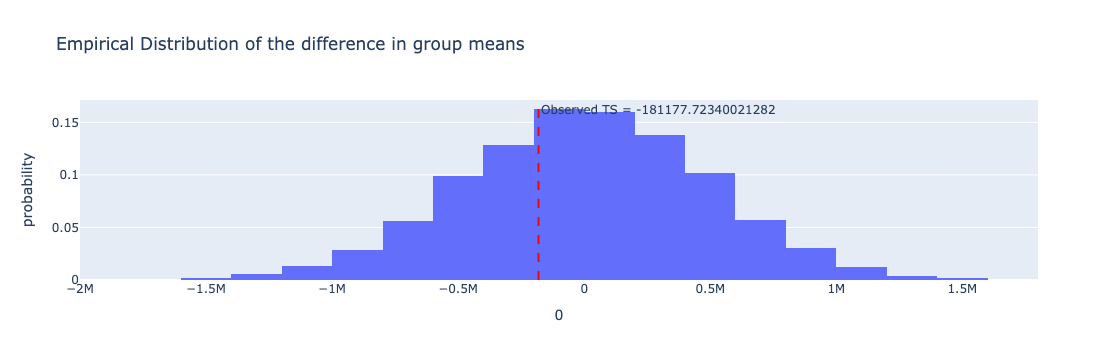

In [39]:
fig = px.histogram(pd.DataFrame(simulated_tss), x=0, nbins=20, histnorm='probability', 
                   title='Empirical Distribution of the difference in group means')
fig.add_vline(
    x=observed_ts,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Observed TS = {observed_ts}",
    annotation_position="top right"
)
fig.write_html("step3-outage-MCAR.html", include_plotlyjs='cdn')
fig.show()

### Different permutation test that shows the missingess of Hurricane_Names column doesn't depend on RES.CUSTOMERS column

#### Null Hypothesis: The missingness of Hurricane_Names column is independent from RES.CUSTOMERS column

#### Alternative Hypothesis: The missingness of Hurricane_Names column depends on RES.CUSTOMERS column

Observed difference in group means of electricity consumption between missing rows of hurricane names and 
not missing rows of hurricane names is -181177.72340021282.

 If the missingess of Hurricane_Names is independant from column RES.CUSTOMERS, when you shuffle the missingess rows, you should get similar differences in group means.



## Step 4: Hypothesis Testing

### Null Hypothesis: On average, the outage duration caused by severe weather is the same as the outage duration caused by public appeal.

### Alternative Hypothesis: On average, the outage duration caused by severe weather is greater than the outage duration caused by public appeal.


In [41]:
observed_ts = df_cleaned.groupby('CAUSE.CATEGORY')['OUTAGE.DURATION'].mean().loc[['severe weather', 'public appeal']]
observed_ts = observed_ts.loc['severe weather'] - observed_ts.loc['public appeal']
observed_ts

np.float64(2415.5359396914446)

In [42]:
simulated_tss = []
simulated_cause_category_df = df_cleaned.copy()
simulated_cause_category_df = simulated_cause_category_df[(simulated_cause_category_df['CAUSE.CATEGORY'] == 'severe weather') | (simulated_cause_category_df['CAUSE.CATEGORY'] == 'public appeal')]
for _ in np.arange(1000):
    simulated_cause_category_df['shuffled_cause_category'] = np.random.permutation(simulated_cause_category_df['CAUSE.CATEGORY'])
    simulated_ts = simulated_cause_category_df.groupby('shuffled_cause_category')['OUTAGE.DURATION'].mean().loc[['severe weather', 'public appeal']]
    simulated_ts = simulated_ts.loc['severe weather'] - simulated_ts.loc['public appeal']
    simulated_tss.append(simulated_ts)

p_value = (simulated_tss >= observed_ts).mean()
p_value

np.float64(0.0)

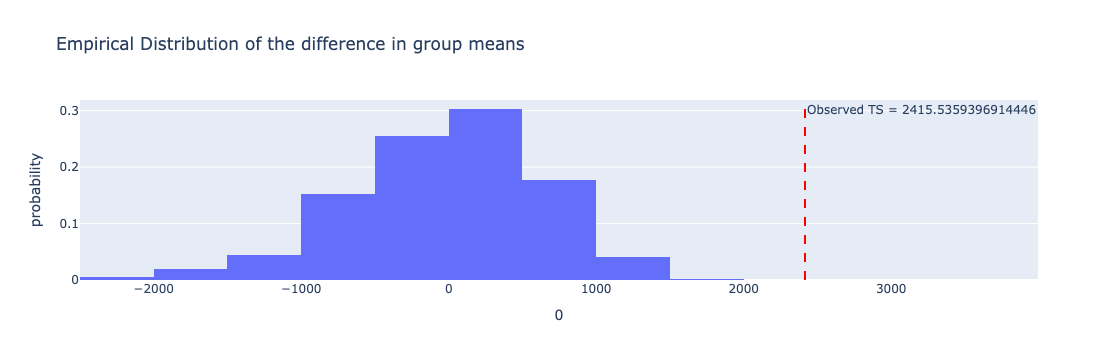

In [43]:
fig = px.histogram(pd.DataFrame(simulated_tss), x=0, nbins=20, histnorm='probability', 
                   title='Empirical Distribution of the difference in group means')
fig.add_vline(
    x=observed_ts,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Observed TS = {observed_ts}",
    annotation_position="top right"
)
fig.write_html("step4-outage-hypotest.html", include_plotlyjs='cdn')
fig.show()

## Step 5: Framing a Prediction Problem

In [123]:
df_cleaned = df_cleaned.drop('is_missing_name', axis=1)
df_cleaned.head()

,U.S._STATE,OUTAGE.START.DATE.TIME,OUTAGE.RESTORATION.DATE.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,CUSTOMERS.AFFECTED,RES.SALES,RES.CUSTOMERS
1,Minnesota,2011-07-01 17:00:00,2011-07-03 20:00:00,severe weather,NaN,NaN,3060.0,70000.0,2332915.0,2308736.0
2,Minnesota,2014-05-11 18:38:00,2014-05-11 18:39:00,intentional attack,vandalism,NaN,1.0,NaN,1586986.0,2345860.0
3,Minnesota,2010-10-26 20:00:00,2010-10-28 22:00:00,severe weather,heavy wind,NaN,3000.0,70000.0,1467293.0,2300291.0
4,Minnesota,2012-06-19 04:30:00,2012-06-20 23:00:00,severe weather,thunderstorm,NaN,2550.0,68200.0,1851519.0,2317336.0
5,Minnesota,2015-07-18 02:00:00,2015-07-19 07:00:00,severe weather,NaN,NaN,1740.0,250000.0,2028875.0,2374674.0


#### Predicting OUTAGE.DURATION based on CAUSE.CATEGORY and CUSTOMERS.AFFECTED

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, Binarizer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

## Step 6: Baseline Model

In [156]:
from sklearn.model_selection import train_test_split
df_clean = df_cleaned.copy()
df_clean = df_clean.dropna(subset=['CAUSE.CATEGORY', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION'], how='any')

In [81]:
X = df_clean[['CAUSE.CATEGORY', 'CUSTOMERS.AFFECTED']]
y = df_clean['OUTAGE.DURATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
categorical_cols = ['CAUSE.CATEGORY']
quantitative_cols = ['CUSTOMERS.AFFECTED']

# Define transformers
transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), categorical_cols),
        ('customer_aff', 'passthrough', quantitative_cols)
    ]
)
pl = Pipeline([
    ('one_hot', transformer),
    ('lin_reg', LinearRegression())
])

In [83]:
pl.fit(X_train, y_train)

Pipeline(steps=[('one_hot',
                 ColumnTransformer(transformers=[('cause', OneHotEncoder(),
                                                  ['CAUSE.CATEGORY']),
                                                 ('customer_aff', 'passthrough',
                                                  ['CUSTOMERS.AFFECTED'])])),
                ('lin_reg', LinearRegression())])

In [84]:
pl.predict(X_train.iloc[:5])

array([2341.4940204 , 2554.58615294, 2718.21046899, 2343.92174863,
       2798.59186555])

In [85]:
pl.named_steps

{'one_hot': ColumnTransformer(transformers=[('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
                                 ('customer_aff', 'passthrough',
                                  ['CUSTOMERS.AFFECTED'])]),
 'lin_reg': LinearRegression()}

In [86]:
pl.named_steps['lin_reg'].coef_

array([-4.80436410e-10,  8.64486696e-10, -4.83020302e-09, -7.81734898e-10,
       -1.95477762e-10,  7.43074803e-09, -2.00738264e-09,  3.80521665e-03])

In [87]:
pl.named_steps['one_hot'].get_feature_names_out()

array(['cause__CAUSE.CATEGORY_equipment failure',
       'cause__CAUSE.CATEGORY_fuel supply emergency',
       'cause__CAUSE.CATEGORY_intentional attack',
       'cause__CAUSE.CATEGORY_islanding',
       'cause__CAUSE.CATEGORY_public appeal',
       'cause__CAUSE.CATEGORY_severe weather',
       'cause__CAUSE.CATEGORY_system operability disruption',
       'customer_aff__CUSTOMERS.AFFECTED'], dtype=object)

In [88]:
pl.score(X_train, y_train)

0.0672017099806328

In [89]:
pl.predict(X_test.iloc[:5])
pl.score(X_test, y_test)

0.069944362461548

## Step 7: Final Model

First change in features:

Standardize the **customers affected** features

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), categorical_cols),
        ('customer_aff', StandardScaler(), quantitative_cols)
    ]
)
pl = Pipeline([
    ('one_hot', transformer),
    ('lin_reg', LinearRegression())
])
pl.fit(X_train, y_train)
pl.predict(X_test.iloc[:5])

array([ 378.40743528, 3721.01930625, 3545.32141944, 3592.96701192,
       3523.08680962])

In [92]:
pl.named_steps

{'one_hot': ColumnTransformer(transformers=[('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
                                 ('customer_aff', StandardScaler(),
                                  ['CUSTOMERS.AFFECTED'])]),
 'lin_reg': LinearRegression()}

In [93]:
pl.named_steps['lin_reg'].coef_

array([-3123.3006519 , 13219.95345583, -2804.43853046, -2949.92561373,
       -1158.16755606,   149.65847399, -3333.77957767,   966.23701572])

In [94]:
pl.named_steps['one_hot'].get_feature_names_out()

array(['cause__CAUSE.CATEGORY_equipment failure',
       'cause__CAUSE.CATEGORY_fuel supply emergency',
       'cause__CAUSE.CATEGORY_intentional attack',
       'cause__CAUSE.CATEGORY_islanding',
       'cause__CAUSE.CATEGORY_public appeal',
       'cause__CAUSE.CATEGORY_severe weather',
       'cause__CAUSE.CATEGORY_system operability disruption',
       'customer_aff__CUSTOMERS.AFFECTED'], dtype=object)

In [95]:
pl.score(X_test, y_test)

0.1908772716231314

Second change in feautes:

Polynomials of the **customers affected** feature

In [96]:
df_clean_tfeatures = df_clean.copy()
obj = StandardScaler()
obj.fit(df_clean_tfeatures[['CUSTOMERS.AFFECTED']])
transformed_cust_aff = obj.transform(df_clean_tfeatures[['CUSTOMERS.AFFECTED']])
df_clean_tfeatures['standardized_customer_aff'] = transformed_cust_aff
df_clean_tfeatures

,U.S._STATE,OUTAGE.START.DATE.TIME,OUTAGE.RESTORATION.DATE.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,CUSTOMERS.AFFECTED,RES.SALES,RES.CUSTOMERS,is_missing_name,standardized_customer_aff
1,Minnesota,2011-07-01 17:00:00,2011-07-03 20:00:00,severe weather,NaN,NaN,3060.0,70000.0,2332915.0,2308736.0,True,-0.257375
3,Minnesota,2010-10-26 20:00:00,2010-10-28 22:00:00,severe weather,heavy wind,NaN,3000.0,70000.0,1467293.0,2300291.0,True,-0.257375
4,Minnesota,2012-06-19 04:30:00,2012-06-20 23:00:00,severe weather,thunderstorm,NaN,2550.0,68200.0,1851519.0,2317336.0,True,-0.263626
5,Minnesota,2015-07-18 02:00:00,2015-07-19 07:00:00,severe weather,NaN,NaN,1740.0,250000.0,2028875.0,2374674.0,True,0.367683
6,Minnesota,2010-11-13 15:00:00,2010-11-14 22:00:00,severe weather,winter storm,NaN,1860.0,60000.0,1676347.0,2300291.0,True,-0.292100
...,...,...,...,...,...,...,...,...,...,...,...,...
1523,Idaho,2004-06-23 17:35:00,2004-06-23 19:10:00,system operability disruption,NaN,NaN,95.0,35000.0,505197.0,588363.0,True,-0.378914
1524,Idaho,2011-01-23 07:00:00,2011-01-23 13:00:00,intentional attack,vandalism,NaN,360.0,0.0,956615.0,667243.0,True,-0.500453
1525,Idaho,2003-06-15 15:12:00,2003-06-16 17:00:00,public appeal,NaN,NaN,1548.0,0.0,486619.0,576895.0,True,-0.500453
1527,Idaho,2016-03-08 00:00:00,2016-03-08 00:00:00,intentional attack,sabotage,NaN,0.0,0.0,678472.0,714365.0,True,-0.500453


In [98]:
X = df_clean_tfeatures[['CAUSE.CATEGORY', 'standardized_customer_aff']]
y = df_clean_tfeatures['OUTAGE.DURATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
train_polynomials_r2 = []
test_polynomials_r2 = []
for d in range(1, 16):
    transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
        ('customer_aff', PolynomialFeatures(d), ['standardized_customer_aff'])
    ]
    )
    pl = Pipeline([
        ('preprocessing', transformer),
        ('lin_reg', LinearRegression())
    ])
    pl.fit(X_train, y_train)
    pl.predict(X_train.iloc[:5])
    train_polynomials_r2.append(pl.score(X_train, y_train))
    pl.predict(X_test.iloc[:5])
    test_polynomials_r2.append(pl.score(X_test, y_test))

r2_train_test = pd.DataFrame({'Train r2': train_polynomials_r2, 'Test r2': test_polynomials_r2})

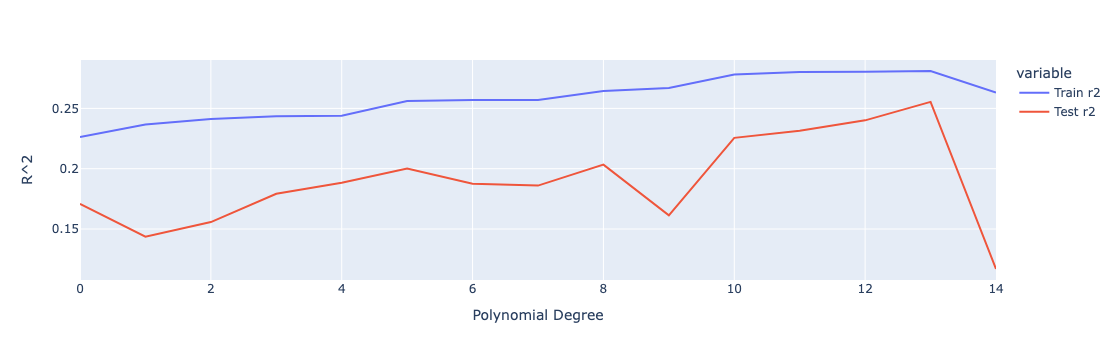

In [120]:
fig = px.line(r2_train_test)
fig.update_layout(showlegend=True, xaxis_title='Polynomial Degree', yaxis_title='R^2')
fig.write_html("step7-outage-polyn.html", include_plotlyjs='cdn')
fig.show()

In [117]:
transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
        ('customer_aff_poly', PolynomialFeatures(14), ['standardized_customer_aff'])
    ]
)
pl = Pipeline([
    ('preprocessing', transformer),
    ('lin_reg', LinearRegression())
])
pl.fit(X_train, y_train)
pl.predict(X_test.iloc[:5])
pl.score(X_test, y_test)

0.25537566050097293

## Step 8: Fairness Analysis

In [189]:
df_clean_tfeatures['RES.CUSTOMERS'].median()

np.float64(4216573.0)

In [190]:
obj = Binarizer(threshold=df_clean_tfeatures['RES.CUSTOMERS'].median())
obj.fit(df_clean[['RES.CUSTOMERS']])
binarized_col = obj.transform(df_clean_tfeatures[['RES.CUSTOMERS']])
binarized_col

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [191]:
df_clean_tfeatures['big number of customers'] = binarized_col
df_clean_tfeatures.head()

,U.S._STATE,OUTAGE.START.DATE.TIME,OUTAGE.RESTORATION.DATE.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,CUSTOMERS.AFFECTED,RES.SALES,RES.CUSTOMERS,is_missing_name,standardized_customer_aff,big number of customers,shuffled_rescustomers_big_low
1,Minnesota,2011-07-01 17:00:00,2011-07-03 20:00:00,severe weather,NaN,NaN,3060.0,70000.0,2332915.0,2308736.0,True,-0.257375,0.0,0.0
3,Minnesota,2010-10-26 20:00:00,2010-10-28 22:00:00,severe weather,heavy wind,NaN,3000.0,70000.0,1467293.0,2300291.0,True,-0.257375,0.0,0.0
4,Minnesota,2012-06-19 04:30:00,2012-06-20 23:00:00,severe weather,thunderstorm,NaN,2550.0,68200.0,1851519.0,2317336.0,True,-0.263626,0.0,0.0
5,Minnesota,2015-07-18 02:00:00,2015-07-19 07:00:00,severe weather,NaN,NaN,1740.0,250000.0,2028875.0,2374674.0,True,0.367683,0.0,1.0
6,Minnesota,2010-11-13 15:00:00,2010-11-14 22:00:00,severe weather,winter storm,NaN,1860.0,60000.0,1676347.0,2300291.0,True,-0.292100,0.0,0.0


In [192]:
big_number_of_customers_df = df_clean_tfeatures[df_clean_tfeatures['big number of customers'] == 1.0]

In [193]:
low_number_of_customers_df = df_clean_tfeatures[df_clean_tfeatures['big number of customers'] == 0.0]

In [194]:
transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
        ('customer_aff_poly', PolynomialFeatures(14), ['standardized_customer_aff'])
    ]
)
pl = Pipeline([
    ('preprocessing', transformer),
    ('lin_reg', LinearRegression())
])
pl.fit(big_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], big_number_of_customers_df['OUTAGE.DURATION'])
pl.predict(big_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']].iloc[:5])
r2_big = pl.score(big_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], big_number_of_customers_df['OUTAGE.DURATION'])

In [195]:
transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
        ('customer_aff_poly', PolynomialFeatures(14), ['standardized_customer_aff'])
    ]
)
pl = Pipeline([
    ('preprocessing', transformer),
    ('lin_reg', LinearRegression())
])
pl.fit(low_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], low_number_of_customers_df['OUTAGE.DURATION'])
pl.predict(low_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']].iloc[:5])
r2_low = pl.score(low_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], low_number_of_customers_df['OUTAGE.DURATION'])

In [196]:
observed_ts = r2_big - r2_low
observed_ts

0.09017210989210456

In [197]:
transformer = ColumnTransformer(
    transformers=[
        ('cause', OneHotEncoder(), ['CAUSE.CATEGORY']),
        ('customer_aff_poly', PolynomialFeatures(14), ['standardized_customer_aff'])
    ])
pl = Pipeline([
    ('preprocessing', transformer),
    ('lin_reg', LinearRegression())
])
simulated_tss = []
for _ in range(1000):
    df_clean_tfeatures['shuffled_rescustomers_big_low'] = np.random.permutation(df_clean_tfeatures['big number of customers'])
    
    big_number_of_customers_df = df_clean_tfeatures[df_clean_tfeatures['shuffled_rescustomers_big_low'] == 1.0]
    pl.fit(big_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], big_number_of_customers_df['OUTAGE.DURATION'])
    pl.predict(big_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']].iloc[:5])
    r2_big = pl.score(big_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], big_number_of_customers_df['OUTAGE.DURATION'])
    
    low_number_of_customers_df = df_clean_tfeatures[df_clean_tfeatures['shuffled_rescustomers_big_low'] == 0.0]
    pl.fit(low_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], low_number_of_customers_df['OUTAGE.DURATION'])
    pl.predict(low_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']].iloc[:5])
    r2_low = pl.score(low_number_of_customers_df[['CAUSE.CATEGORY', 'standardized_customer_aff']], low_number_of_customers_df['OUTAGE.DURATION'])

    simulated_ts = r2_big - r2_low
    simulated_tss.append(simulated_ts)

p_value = (np.array(simulated_tss) >= observed_ts).mean()
p_value

np.float64(0.176)

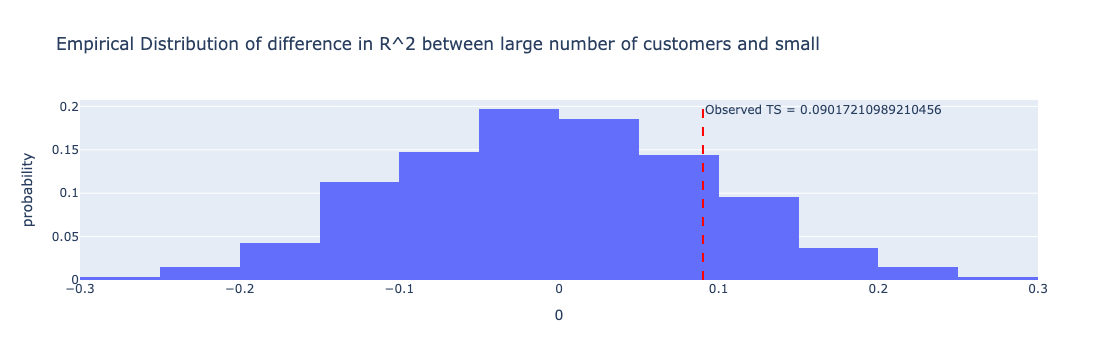

In [201]:
fig = px.histogram(pd.DataFrame(simulated_tss), x=0, nbins=20, histnorm='probability', 
                   title='Empirical Distribution of difference in R^2 between large number of customers and small')
fig.add_vline(
    x=observed_ts,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Observed TS = {observed_ts}",
    annotation_position="top right"
)
fig.write_html("step8-outage-fairnessanalysis.html", include_plotlyjs='cdn')
fig.show()